<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%98%A4%EC%9D%BC%EB%9F%AC%EB%93%B1%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-ionq
!python3 -m pip install qiskit-ibm-provider
!python3 -m pip install qiskit-aer

In [21]:
from qiskit import QuantumCircuit
import numpy as np

# 오일러 등식을 계산할 양자회로를 생성합니다.
qc = QuantumCircuit(2, 1)

# Hadamard 게이트를 적용하여 초기화합니다.
qc.h(0)

# Controlled-Rz 게이트를 적용합니다.
theta = np.pi
qc.crz(theta, 0, 1)

# Hadamard 게이트를 다시 적용합니다.
qc.h(0)

# 측정 게이트를 추가합니다.
qc.measure(0, 0)

qc.draw()

┌───┐         ┌───┐┌─┐
q_0: ┤ H ├────■────┤ H ├┤M├
     └───┘┌───┴───┐└───┘└╥┘
q_1: ─────┤ Rz(π) ├──────╫─
          └───────┘      ║ 
c: 1/════════════════════╩═
                         0

In [17]:
from qiskit_aer import Aer

#여러 장치들에게 선택적으로 수행시키기 위한 준비
from qiskit.compiler import transpile, assemble
#
#백엔드들을 이용한 실제 장치나 시뮬레이터를 이용한 실행
#
#backend = ionq_provider.get_backend('ionq_simulator')
#backend = ionq_provider.get_backend('ionq_qpu')
#backend = ibm_provider.get_backend('ibmq_qasm_simulator') # Cloud상 시뮬레이터
#backend = ibm_provider.get_backend('ibmq_quito')
backend = Aer.get_backend('qasm_simulator')  #Local Qiskit Aer 시뮬레이터 사용

#양자컴 하드웨어마다 지원할 수 있는 Gate의 종류가 달라서, 일반GATE를 각 하드웨어 지원 Gate로 변환하는 과정을 Transpile이라 한다.
trans_qc = transpile(qc, backend)
trans_qc.draw('mpl')

┌───┐              ┌───┐┌─┐
q_0: ───┤ H ├────■─────────┤ H ├┤M├
     ┌──┴───┴──┐ │ZZ(-π/2) └───┘└╥┘
q_1: ┤ Rz(π/2) ├─■───────────────╫─
     └─────────┘                 ║ 
c: 1/════════════════════════════╩═
                                 0

In [18]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)
#job = backend.run(qc, shots=2048) # if you don’t pass a shots kwarg, it defaults to 1024

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
###while

# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", job.status() )

# 결과 출력
counts = job.result().get_counts()
print(counts)

Job ID is 1a3bb528-ca2f-47d4-8218-839d493c804b 

Job status is JobStatus.DONE
{'1': 504, '0': 520}


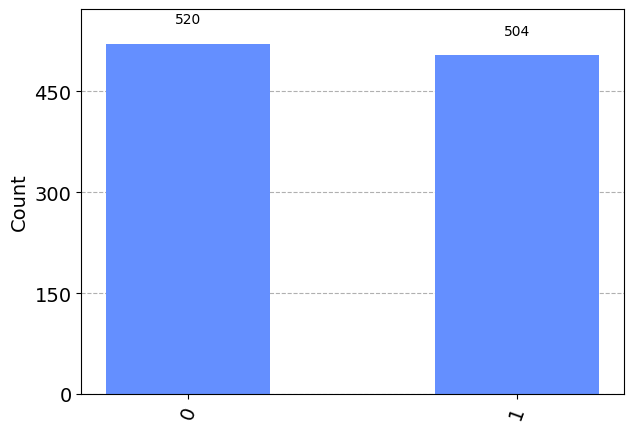

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)